### 베타분포 (Beta Distribution)

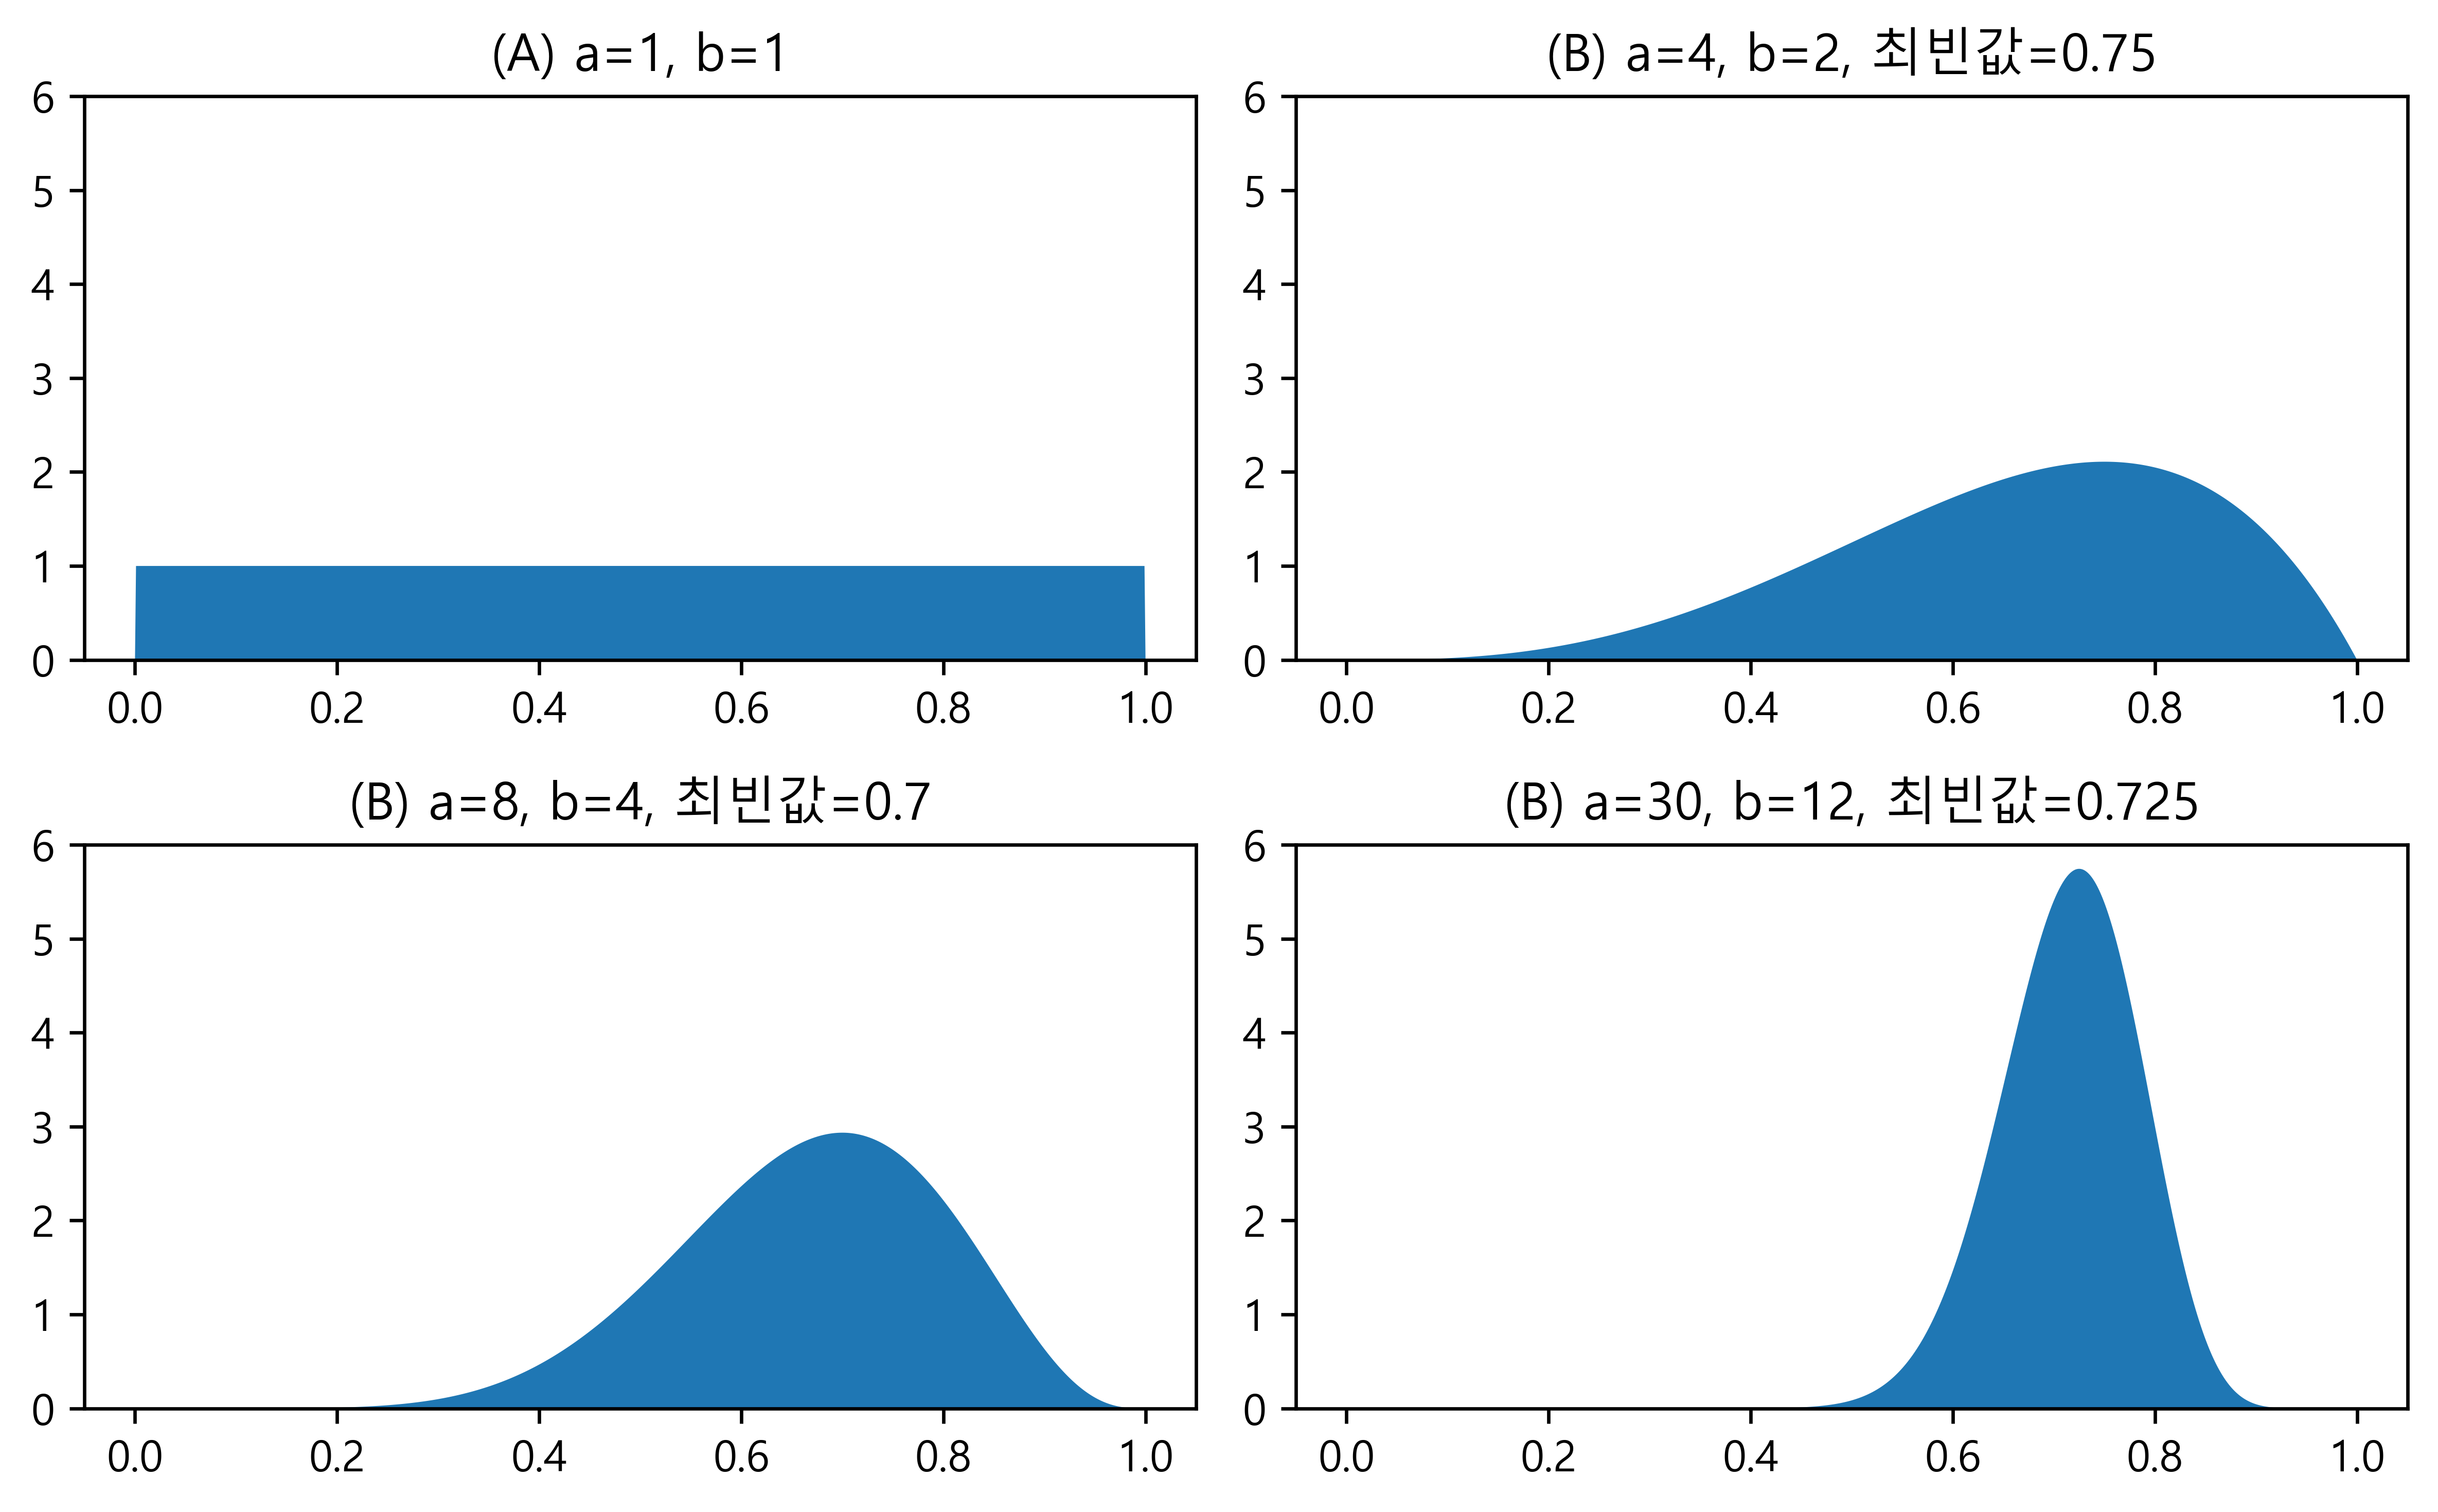

In [1]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221) # subplot안에 들어가는 숫자의 의미?
plt.fill_between(xx, sp.stats.beta(1.0001, 1.0001).pdf(xx))
plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4, 2).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=4, b=2, 최빈값={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8, 4).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=8, b=4, 최빈값={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(30, 12).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=30, b=12, 최빈값={0}".format((30-1)/(30+12-2)))
plt.tight_layout()
plt.show()

이 그림으로부터 모수 a, b가 베타분포의 모양을 결정하는 형상 인자(shape factor)라는 것을 알 수 있다.

위 그림이 베이지안 추정 결과라면 각각은 베르누이분포의 모수 mu에 대해 다음과 같이 추정한 것과 같다.

(A) 베르누이분포의 모수 mu를 추정할 수 없다. (정보가 없음)

(B) 베르누이분포의 모수 mu값이 0.75일 가능성이 가장 크다. (정확도 낮음)

(C) 베르누이분포의 모수 mu값이 0.70일 가능성이 가장 크다. (정확도 중간)

(D) 베르누이분포의 모수 mu값이 0.725일 가능성이 가장 크다. (정확도 높음)

### 감마분포 (Gamma Distribution)

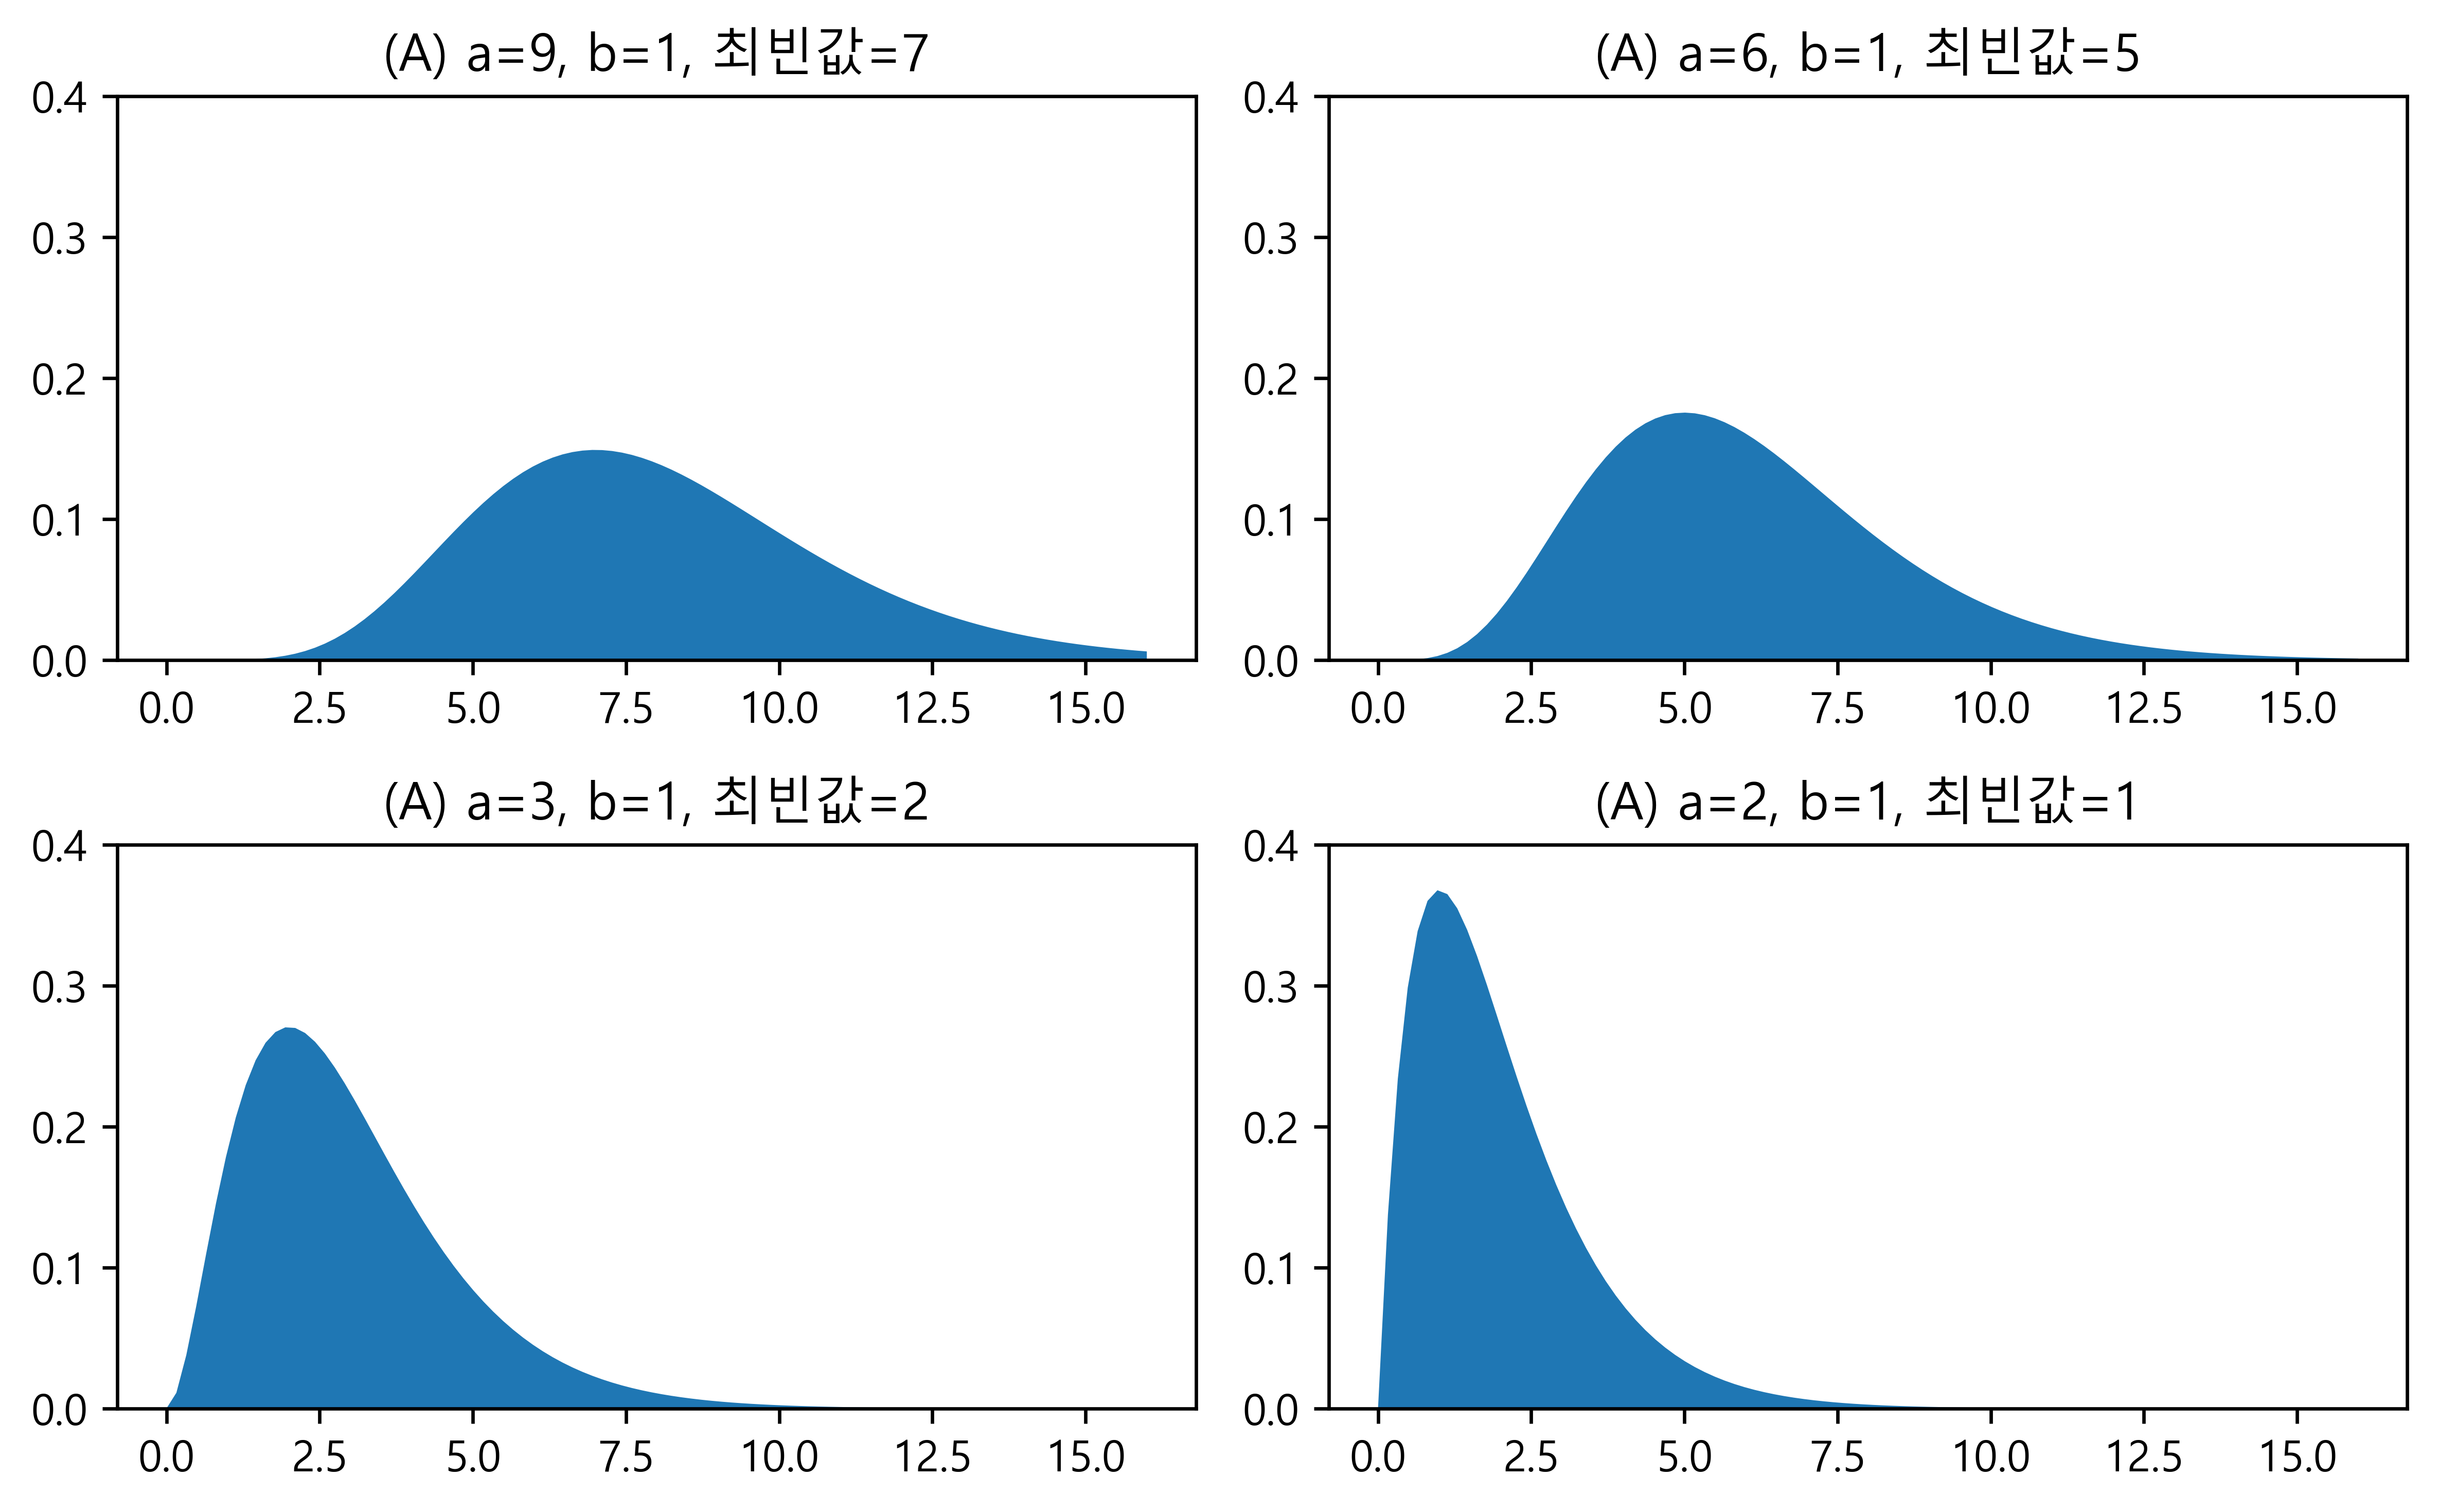

In [1]:
xx = np.linspace(0, 16, 100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(8).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=9, b=1, 최빈값=7")
plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=6, b=1, 최빈값=5")
plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=3, b=1, 최빈값=2")
plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=2, b=1, 최빈값=1")
plt.tight_layout()
plt.show()

위 그림이 베이지안 추정 결과라면 각각은 모수에 대해 다음과 같이 추정한 것과 같다.

(A): 추정하고자 하는 모숫값이 8일 가능성이 가장 크다. (정확도 아주 낮음)

(B): 추정하고자 하는 모숫값이 5일 가능성이 가장 크다. (정확도 낮음)

(C): 추정하고자 하는 모숫값이 2일 가능성이 가장 크다. (정확도 높음)

(D): 추정하고자 하는 모숫값이 1일 가능성이 가장 크다. (정확도 아주 높음)
